Silhouette Score for USD_CAP and PC_GDP: 0.34870500020556583


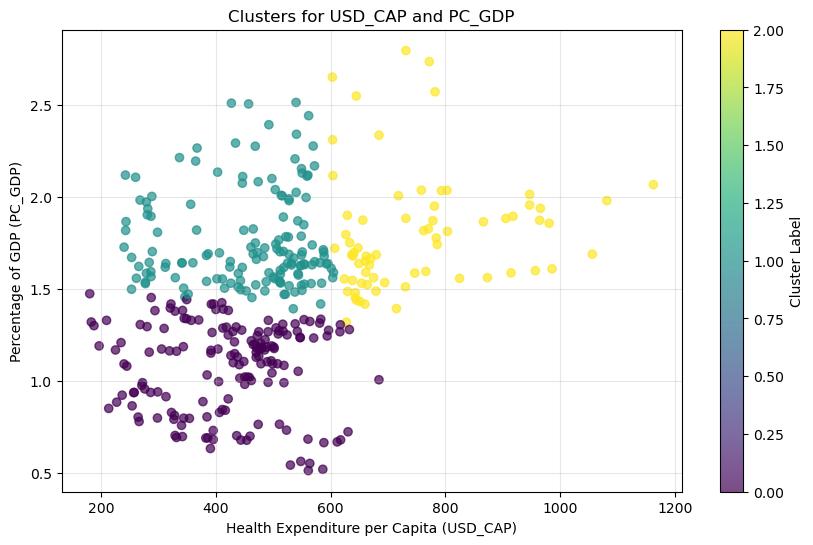

Silhouette Score for USD_CAP and PC_HEALTHXP: 0.39021823064359046


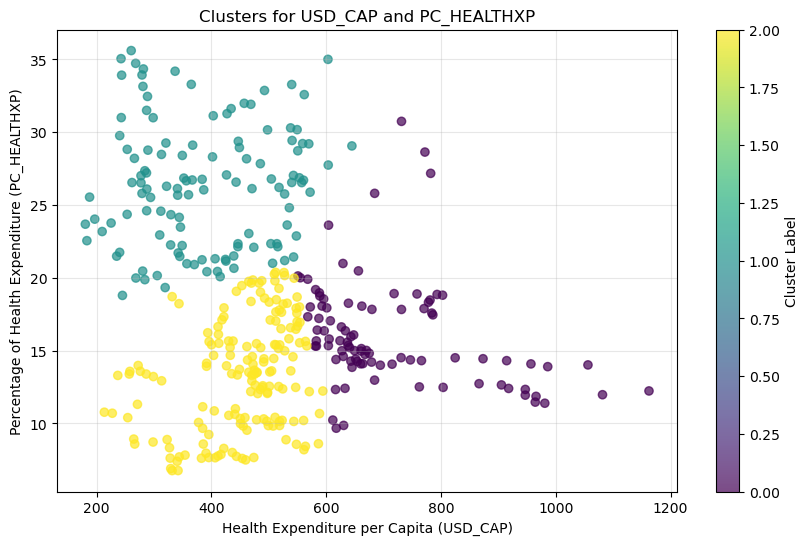

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma_spending_data.csv')

# Filter the dataset for years between 2004 and 2015
filtered_data = df[(df['TIME'] >= 2004) & (df['TIME'] <= 2015)]

# Select features for clustering: USD_CAP and PC_GDP
data_usd_gdp = filtered_data[['USD_CAP', 'PC_GDP']].dropna()

# Standardize the features
scaler = StandardScaler()
data_usd_gdp_scaled = scaler.fit_transform(data_usd_gdp)

# Apply K-Means Clustering for USD_CAP and PC_GDP
kmeans_usd_gdp = KMeans(n_clusters=3, random_state=42)
clusters_usd_gdp = kmeans_usd_gdp.fit_predict(data_usd_gdp_scaled)

# Evaluate silhouette score
silhouette_gdp = silhouette_score(data_usd_gdp_scaled, clusters_usd_gdp)
print(f"Silhouette Score for USD_CAP and PC_GDP: {silhouette_gdp}")

# Visualize clusters for USD_CAP and PC_GDP
plt.figure(figsize=(10, 6))
plt.scatter(data_usd_gdp['USD_CAP'], data_usd_gdp['PC_GDP'], c=clusters_usd_gdp, cmap='viridis', alpha=0.7)
plt.title("Clusters for USD_CAP and PC_GDP")
plt.xlabel("Health Expenditure per Capita (USD_CAP)")
plt.ylabel("Percentage of GDP (PC_GDP)")
plt.colorbar(label="Cluster Label")
plt.grid(alpha=0.3)
plt.show()

# Repeat for USD_CAP and PC_HEALTHXP
data_usd_healthxp = filtered_data[['USD_CAP', 'PC_HEALTHXP']].dropna()
data_usd_healthxp_scaled = scaler.fit_transform(data_usd_healthxp)

kmeans_usd_healthxp = KMeans(n_clusters=3, random_state=42)
clusters_usd_healthxp = kmeans_usd_healthxp.fit_predict(data_usd_healthxp_scaled)

# Evaluate silhouette score
silhouette_healthxp = silhouette_score(data_usd_healthxp_scaled, clusters_usd_healthxp)
print(f"Silhouette Score for USD_CAP and PC_HEALTHXP: {silhouette_healthxp}")

# Visualize clusters for USD_CAP and PC_HEALTHXP
plt.figure(figsize=(10, 6))
plt.scatter(data_usd_healthxp['USD_CAP'], data_usd_healthxp['PC_HEALTHXP'], c=clusters_usd_healthxp, cmap='viridis', alpha=0.7)
plt.title("Clusters for USD_CAP and PC_HEALTHXP")
plt.xlabel("Health Expenditure per Capita (USD_CAP)")
plt.ylabel("Percentage of Health Expenditure (PC_HEALTHXP)")
plt.colorbar(label="Cluster Label")
plt.grid(alpha=0.3)
plt.show()
